In [ ]:
#Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Read the csv file
df = pd.read_csv('/content/drive/MyDrive/Time Series/Time Series Forecasting LSTM/monthly_milk_production.csv', index_col = 'Date', parse_dates = True)
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


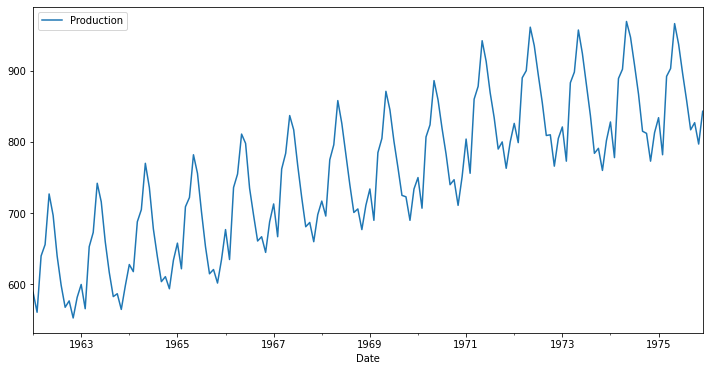

In [ ]:
#How is look this data?
df.plot(figsize = (12,6))

In [ ]:
#As its name implies, statsmodels is a Python library built specifically for statistics. Statsmodels is built on top of NumPy, SciPy, and matplotlib, but it contains more advanced functions for statistical testing and modeling that you won't find in numerical libraries like NumPy or SciPy.
#Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.

from statsmodels.tsa.seasonal import seasonal_decompose

Figure(432x288)


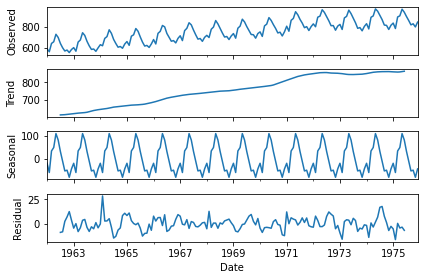

In [ ]:
results = seasonal_decompose(df['Production'])
print(results.plot())

In [ ]:
len(df)

168

In [ ]:
#Train_Test_Split
train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
df.head(), df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#Question: why to use Scaler.fit only on x_train and not on x_test for normalizing value using MinMaxScaler?
#Answer: If you would fit the scaler using x_test you would be using information from your test set 
#and would be leaking data. This is information that you would not have if your model was in production 
#and can therefore not use when fitting your model.

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
scaled_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

#define generator

n_input = 3
n_feature = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [ ]:
X, y = generator[0]
print('Given the Array: \n', X.flatten())
print('Predict this y: \n', y)

Given the Array: 
 [0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
#Same thing, but we have used 12 months for single row instead of 3 months.
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#Define model
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (n_input, n_feature)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scaled_train.shape

(156, 1)

In [ ]:
#Fit the model
model.fit(generator, epochs = 50)

Epoch 1/50
144/144 [==============================] - 2s 5ms/step - loss: 0.0452
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0236
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0169
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0120
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0283
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0066
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0073
Epoch 9/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0047
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0046
Epoch 11/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0046
Epoch 12/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 13/50
144/144 [====

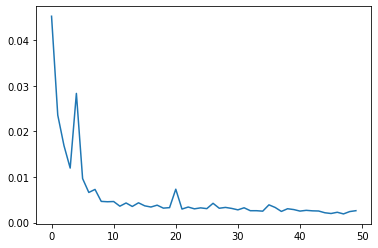

In [ ]:
#Check the amount of loss per epoch.

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
#Predict for the last 12 data of training set (n_input = 12)
last_train_batch = scaled_train[-12:]
last_train_batch  = last_train_batch.reshape((1, n_input, n_feature))

In [ ]:
print(last_train_batch)

[[[0.66105769]
  [0.54086538]
  [0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]]]


In [ ]:
model.predict(last_train_batch)

array([[0.6164183]], dtype=float32)

In [ ]:
#Actual output
scaled_test[0]

array([0.67548077])

In [ ]:
#Prediction and compare with test data
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_feature))
print("*************")
print(current_batch)
print("*************")
for i in range(len(test)):
  #get the prediction value for the first batch
  current_pred = model.predict(current_batch)[0]
  print("-------------------")
  print(model.predict(current_batch))
  print(current_pred)
  print("-------------------")

  #append the predictin into the array
  test_predictions.append(current_pred)

  #use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
  print("*************")
  print(current_batch)
  print("*************")

*************
[[[0.66105769]
  [0.54086538]
  [0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]]]
*************
-------------------
[[0.6164183]]
[0.6164183]
-------------------
*************
[[[0.54086538]
  [0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]
  [0.6164183 ]]]
*************
-------------------
[[0.5969374]]
[0.5969374]
-------------------
*************
[[[0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]
  [0.6164183 ]
  [0.59693742]]]
*************
-------------------
[[0.75329256]]
[0.75329256]
-------------------
*************
[[[0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]
  [0.6164183 ]
  [0.5

In [ ]:
#Actual test
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


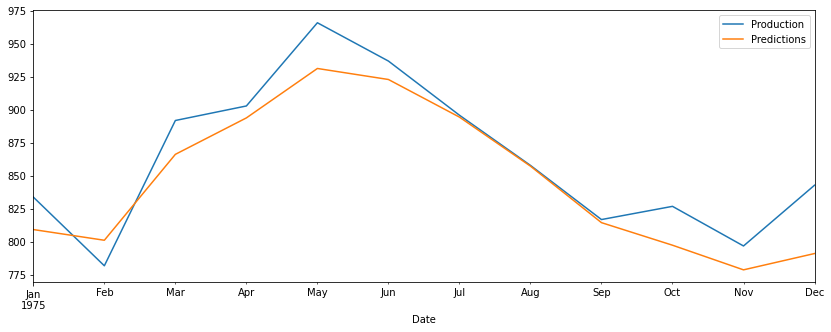

In [ ]:
#Our original test value is not normalized 0-1 but our test prediction is normalized (0-1)
#Now, we will remove normalized from test predictions data.

predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = predictions

#Plot to campare original test to predictions test.
test.plot(figsize = (14,5))

In [ ]:
#Errors count
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['Production'], test['Predictions']))
print(rmse)

24.126409995215518


In [ ]:
#For next 30 days
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_feature))
print("*************")
print(current_batch)
print("*************")
for i in range(30):
  #get the prediction value for the first batch
  current_pred = model.predict(current_batch)[0]
  print("-------------------")
  print(model.predict(current_batch))
  print(current_pred)
  print("-------------------")

  #append the predictin into the array
  test_predictions.append(current_pred)

  #use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
  print("*************")
  print(current_batch)
  print("*************")

*************
[[[0.66105769]
  [0.54086538]
  [0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]]]
*************
-------------------
[[0.6164183]]
[0.6164183]
-------------------
*************
[[[0.54086538]
  [0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]
  [0.6164183 ]]]
*************
-------------------
[[0.5969374]]
[0.5969374]
-------------------
*************
[[[0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]
  [0.6164183 ]
  [0.59693742]]]
*************
-------------------
[[0.75329256]]
[0.75329256]
-------------------
*************
[[[0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]
  [0.6164183 ]
  [0.5